## TITANIC DATASET EDA, Sept.2023

### HISTORY
The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2240 passengers and crew on board, more than 1500 lost their lives in the disaster. This tragic event sparked a broader discussion on maritime safety. The sinking of the Titanic significantly influenced maritime regulations and safety practices, leaving a lasting impact on popular culture through numerous movies, books, and other works.

Tutkielmassa käytetyt materiaalit:

https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/

https://www.kaggle.com/code/thulani96/titanic-dataset-analysis-with-seaborn

Kaggle: train.csv (gender_submission.csv, test.csv)

https://gist.github.com/mwaskom/8224591

https://www.scaler.com/topics/machine-learning/the-titanic-dataset/

https://seaborn.pydata.org/

### Avainkäsitteet:
1. Passenger ID: Unique ID of passenger
2. Survived: If the passenger survived (0 -No, 1 - Yes)
3. Pclass: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3nd)
4. Name: Name of the passenger
5. Sex: Male/Female
6. Age: Passenger age in years
7. SibSp: No of siblings/spouses aboard
8. Parch: No of parents / children aboard
9. Ticket: Ticket Number
10. Fare: Passenger Fare
11. Cabin: Cabin number
12. Embarked: Port of Embarkation( C = Cherbourg; Q = Queenstown; S = Southhampotn)

In [337]:
# FOR MAC:
# python3 -m venv env
# source env/bin/activate

# FOR Windows:
# python -m venv env
# env\Scripts\activate

Tuodaan tarvittavia kirjastoja

In [338]:
# pip install seaborn

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Poistetaan varoituksia

In [339]:
import warnings
warnings.filterwarnings('ignore')

### Tutkielmassa voidaan joko käyttää seabornin sisältävää harjoitusdatasettia, tai käyttää Kagglen csv-tiedostoa

1. Seabornin valmis datasetti

    Ladataan ja tarkistetaan sisältö

In [340]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [341]:
titanic_sb =sns.load_dataset('titanic')
titanic_sb.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [342]:
titanic_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


2. Tuodaan ja tarkistetaan dataa train.csv tiedostosta

In [343]:
titanic = pd.read_csv('train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [344]:
display(titanic.head(3))
print('Dataset sisältää',titanic.shape[0],'riviä,', titanic.shape[1],'saraketta.')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Dataset sisältää 891 riviä, 12 saraketta.


Selvyyden vuoksi voidaan muuttaa sarakkeet "Survived" ja "Embarked" stringeiksi

In [345]:
titanic['Survived'] = titanic['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

titanic['Embarked'] = titanic['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})

titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


Tutkitaan selviytyneiden ja menehtyneiden määrä ja niiden suhdetta

<Axes: xlabel='age', ylabel='sex'>

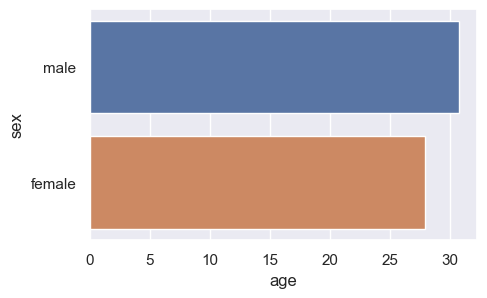

In [363]:
# sukupuolijakauma
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'age', y = 'sex', data=titanic_sb, ci=True)

Miehia oli mukana enemmän kun naisia.

<Axes: xlabel='survived', ylabel='who'>

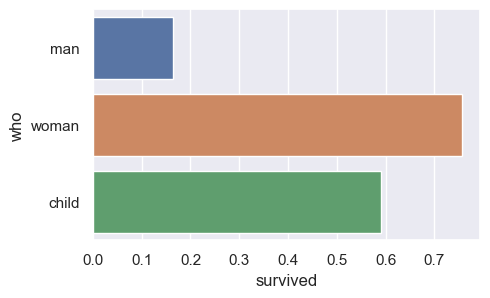

In [372]:
# selviytyneiden jakauma
plt.figure(figsize=(5,3))
sns.barplot(x = 'survived', y = 'who', data = titanic_sb, errorbar=None)

Enemmistö selviytyjistä on naisia.

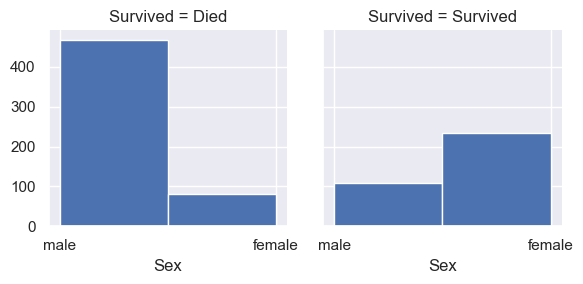

In [374]:
# menehtyneiden ja selviytyneiden sukupuolijakauma
surv_hist = sns.FacetGrid(titanic, col='Survived')
surv_hist.map(plt.hist, 'Sex', bins=2)

Enemmistö menehtyneistä oli miespuolisia.

<Axes: xlabel='survived', ylabel='class'>

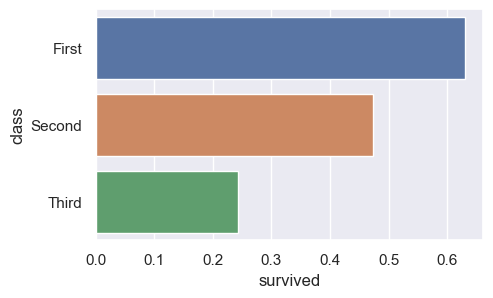

In [364]:
# selviytyneiden matkustusluokka jakauma
plt.figure(figsize=(5,3))
sns.barplot(x = 'survived', y = 'class', data = titanic_sb, errorbar=None)

Eniten selviytyistä kuului ensimmäiseen luokkaan.

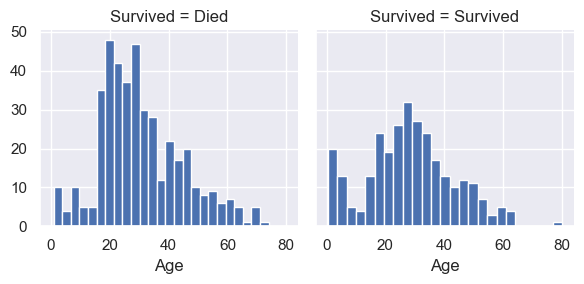

In [373]:
# menehtyneiden ja selviytyneiden histogrammi-ikäjakauma
surv_hist = sns.FacetGrid(titanic, col='Survived')
sns.set_theme(style="darkgrid")
surv_hist.map(plt.hist,'Age', bins=25)

Suhteessa sekä menehtyneitä että selviytyneitä oli eniten 20-40 ikähaarukassa. Ym. ikähaarukan menehtyneitä oli selvästi eniten 20-30 vuotiaita, selviytyneiden ikäjakauma ikähaarukassa oli tasaisempi.

In [370]:
survived = titanic[titanic['Survived'] == 'Survived']['PassengerId'].count()
died = titanic[titanic['Survived'] == 'Died']['PassengerId'].count()

total_pass = [survived, died]
print('Selviytyneitä yhteensä', total_pass[0])
print('Menehtyneitä yhteensä', total_pass[1])

Selviytyneitä yhteensä 342
Menehtyneitä yhteensä 549


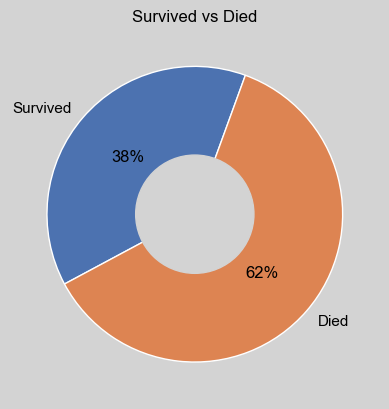

Total number of passanger and crew onboard was 2240, 
our report handle 891 persons.


In [348]:
# määrätään piiraan ominaisuuksia ennen piiraan piirtämistä
fig = plt.figure()
fig.patch.set_facecolor('lightgray')
my_circle=plt.Circle( (0,0), 0.4, color='lightgray')
plt.rcParams['text.color'] = 'black'

y = np.array(total_pass)
labels = ['Survived','Died',]
plt.pie(y, labels=labels, autopct='%1.f%%', startangle=70)
plt.title('Survived vs Died')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print(f'Total number of passanger and crew onboard was 2240, \nour report handle {survived+died} persons.')

PÄÄTELMÄ : Melkein 2/3 osa on menehtynyt onnettomuudessa.

-----

Lasketaan kaikkien lippujen total, varustamon saatu könttäsumma.

In [351]:
print('Kaikkien lippujen yhteishinta oli',round(titanic['Fare'].sum(),2),'USD')

Kaikkien lippujen yhteishinta oli 28693.95 USD


Tutkitaan poikkeavaa tietoa lipun hinnoissa.

<Axes: xlabel='Fare'>

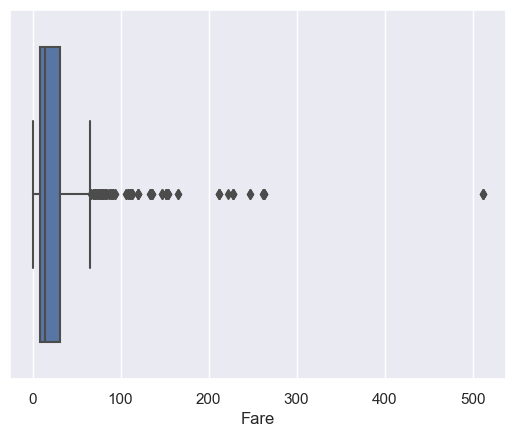

In [352]:
sns.boxplot(x = 'Fare', data=titanic)

Osa lipuista maksoi poikkeavasti yli 500 USD, etsitään ne.

In [353]:
indices = ', '.join(map(str, np.where(titanic['Fare'] > 500)[0]))
print('Poikkeavat lippujen hinnat löytyivät riveiltä', indices)
print()
display(titanic.loc[[258,679,737]])

Poikkeavat lippujen hinnat löytyivät riveiltä 258, 679, 737



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,Survived,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,Cherbourg
679,680,Survived,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,Cherbourg
737,738,Survived,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,Cherbourg


----

Lasketaan matkustajien syntymävuosi ja lisätään tiedot omana sarakkeena. 

In [354]:
titanic['Born'] = np.subtract(1912,titanic['Age'])
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Born
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,Southampton,NaN
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,Cherbourg,1886.0
890,891,Died,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Queenstown,1880.0


Järjestetään matkustajat luokkien mukaan, reindeksoidaan ja kuvaillaan niiden suhdetta.

In [355]:
titanic.sort_values(['Pclass'], ignore_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Born
0,446,Survived,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,Southampton,1908.0
1,311,Survived,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,Cherbourg,1888.0
2,310,Survived,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,Cherbourg,1882.0
3,308,Survived,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,Cherbourg,1895.0
4,307,Survived,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,Cherbourg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,380,Died,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,Southampton,1893.0
887,382,Survived,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,Cherbourg,1911.0
888,383,Died,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,Southampton,1880.0
889,372,Died,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,Southampton,1894.0


Lasketaan ja visualisoidaan matkustaja-määrän per luokka

In [356]:
f = titanic[titanic['Pclass'] == 1]['PassengerId'].count()
s = titanic[titanic['Pclass'] == 2]['PassengerId'].count()
t = titanic[titanic['Pclass'] == 3]['PassengerId'].count()

pclass = [f,s,t]
ptotal = f+s+t

print(f'Ensimmäisessä luokassa matkusti {f} matkustajaa, toisessa {s} ja kolmannessa {t}.')
print('Yhteismatkustajamäärä tutkielmassa on', f+s+t)

Ensimmäisessä luokassa matkustii 216 matkustajaa, toisessa 184 ja kolmannessa 491.
Yhteismatkustajamäärä tutkielmassa on 891


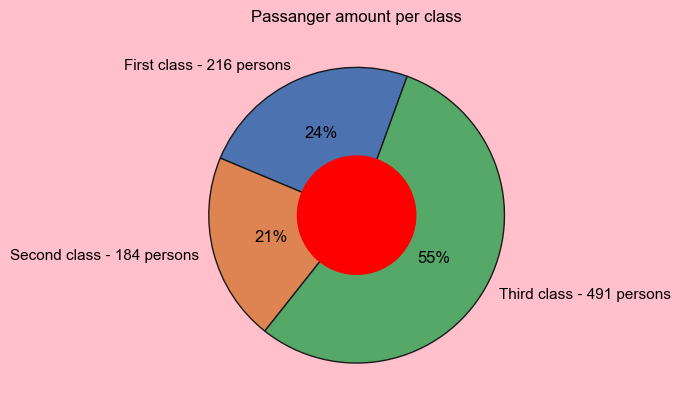

In [357]:
fig = plt.figure()
fig.patch.set_facecolor('pink')
my_circle=plt.Circle( (0,0), 0.4, color='red')
plt.rcParams['text.color'] = 'black'

wedgeprops=({"edgecolor":"k",'linewidth': 1, 'antialiased': True})

y = np.array(pclass)
labels = [(f'First class - {f} persons'),(f'Second class - {s} persons'),(F'Third class - {t} persons')]
plt.pie(y, labels=labels, autopct='%1.f%%', wedgeprops=wedgeprops, startangle=70)
plt.title('Passanger amount per class')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Selvitetään kaikki lähtösatamat ja järjestetään matkustajat niiden mukaan.

In [ ]:
ports = titanic['Embarked'].unique()
print(ports)

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [ ]:
c = titanic['Embarked'].loc[titanic['Embarked']=='Cherbourg'].count()
s = titanic['Embarked'].loc[titanic['Embarked']=='Southampton'].count()
q = titanic['Embarked'].loc[titanic['Embarked']=='Queenstown'].count()
ports = (c+s+q)
u = ptotal-ports
print(f'Embarkment destination: Cherbourg {c}, Southampton {s}, Queenstown {q} and {u} unknown locations.')
ptotal_loc = [c,s,q,u]

Embarkment destination: Cherbourg 168, Southampton 644, Queenstown 77 and 2 unknown locations.


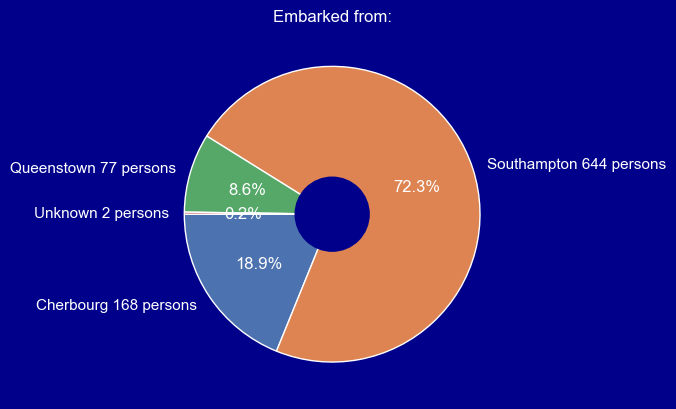

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('darkblue')
my_circle=plt.Circle( (0,0), 0.25, color='darkblue')
plt.rcParams['text.color'] = 'white'
ptotal = 891
y = np.array(ptotal_loc)
labels = [f'Cherbourg {c} persons',f'Southampton {s} persons',f'Queenstown {q} persons',f'Unknown {u} persons']
plt.pie(y, labels=labels, autopct='%1.1f%%', startangle=180)  
plt.title('Embarked from:')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Taulun arvojen suhteita pareittain

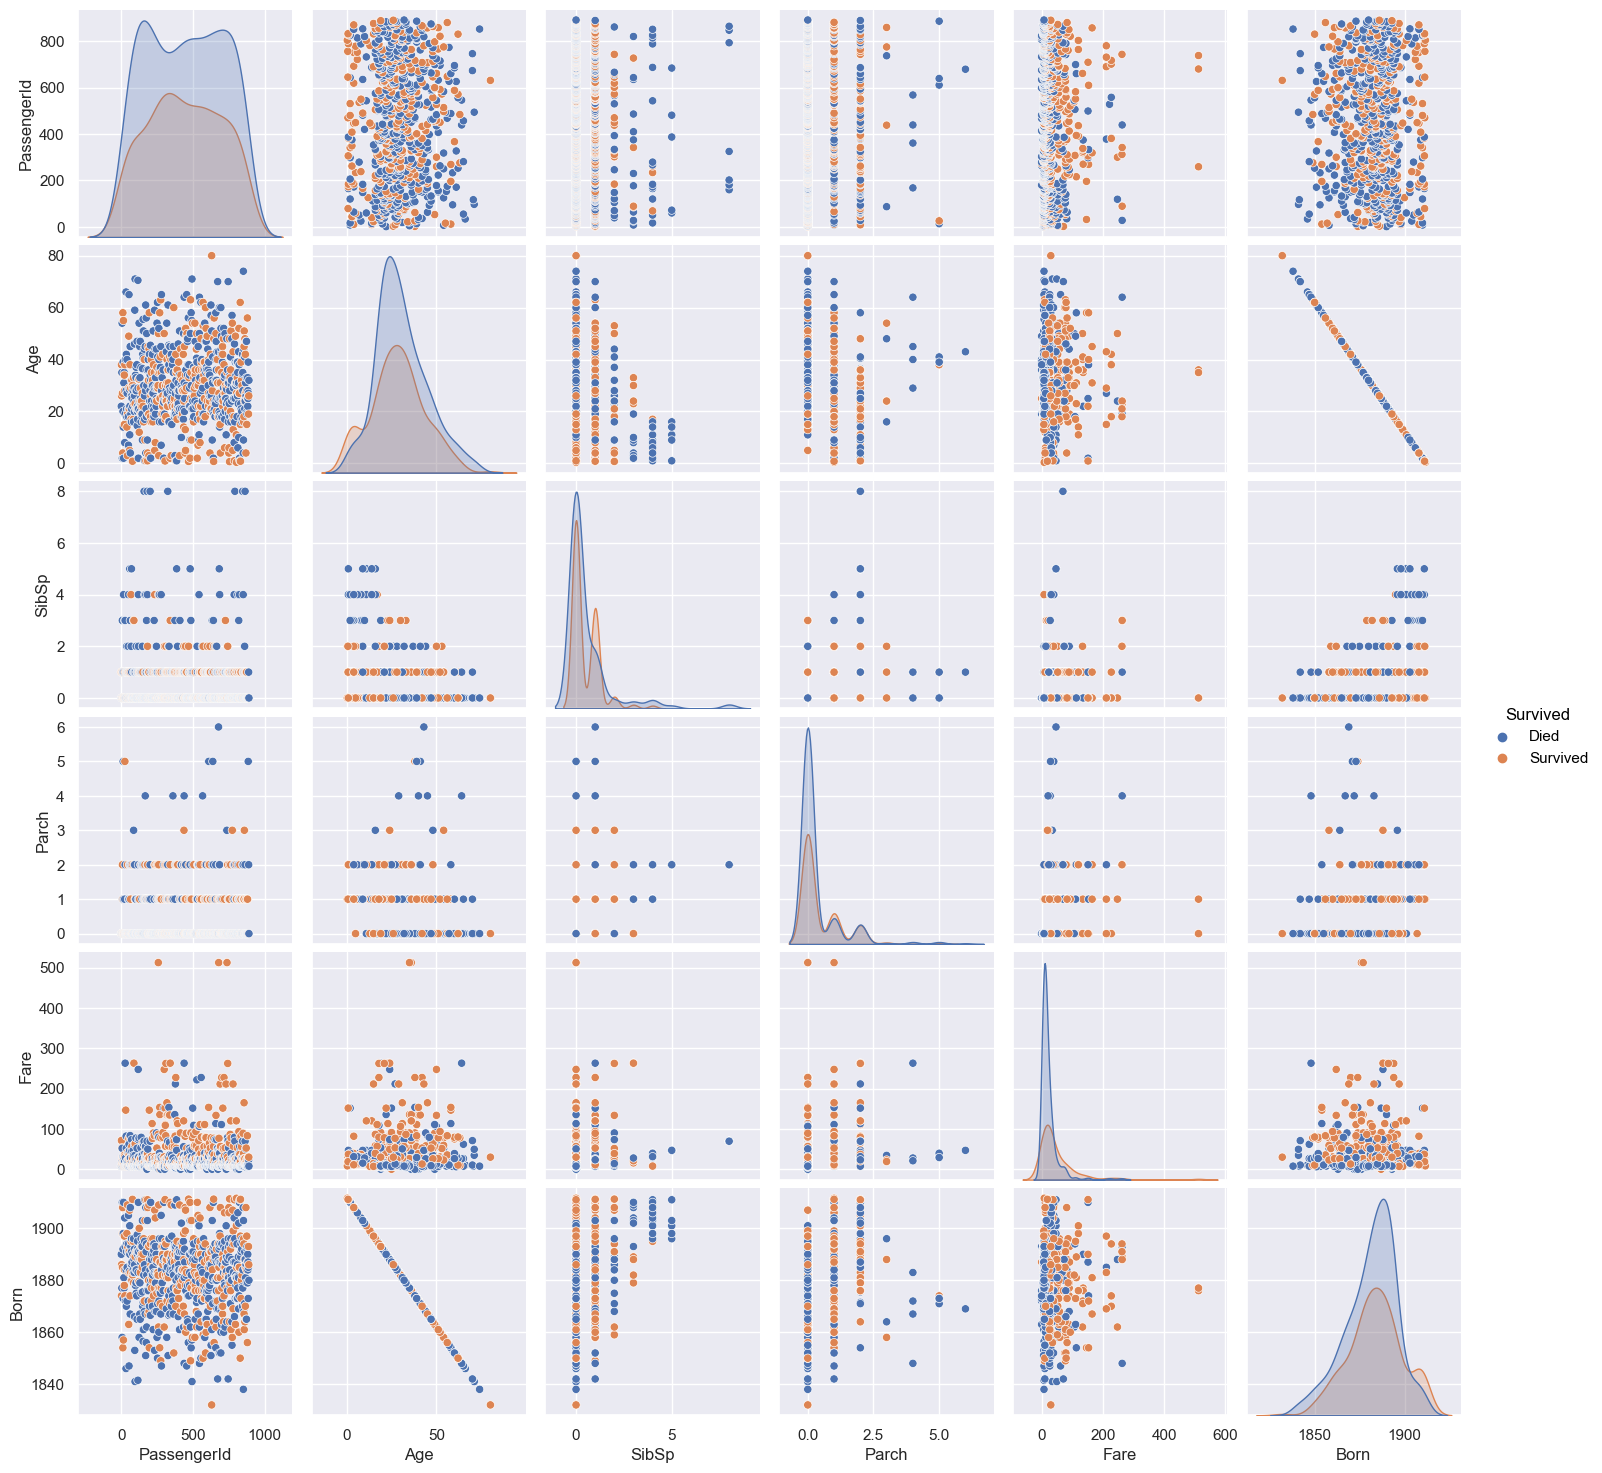

In [367]:
sns.pairplot(titanic, hue='Survived')

PÄÄTELMÄ 

Titanicin uppoaminen on kiistämättä yksi historian tunnetuimmista merenkulun tragedioista, joka johti johti yli 1 500 ihmisen menetykseen.

Yleisesti ottaen naiset, lapset ja ensimmäisen luokan matkustajat olivat suuremmassa määrin selviytyneitä verrattuna miehiin, aikuisiin ja alempiin matkustusluokkiin. Tämä korostaa aikakauden sosiaalisia normeja ja priorisointia hätätilanteessa.